<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Python do Zero**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise de Dados da Empresa

Com o conteúdo que temos até aqui, já é possível fazer análises e plotar visualizações informativas....

In [2]:
# importar as bibliotecas necessárias - pandas, matplotlib, google.colab drive
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt


In [3]:
# montar o drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# verificar 
!ls 'gdrive/My Drive/'

 881198_seival.zip	    DSCN4362.JPG	      relatorios
'Colab Notebooks'	    modelo_de_relatorio.pdf
 controle_da_empresa.xlsx   PI.xlsx


In [6]:
# importar a planilha com pandas
planilha = pd.read_excel('/content/gdrive/MyDrive/controle_da_empresa.xlsx',None)

# associar à variável 'df' a planilha Vendas
df = planilha['Vendas']

# visualizar as 5 primeiras entradas
df.head()

,Data da Venda,Item,Quantidade,Vendedor,Preço Unitário,Total de Vendas
0,2020-01-02,Lente 50mm f/1.4,2,Carlos,1649,3298
1,2020-01-02,Filtro ND 5 Stop,2,Raquel,1220,2440
2,2020-01-03,Filtro ND 5 Stop,2,Raquel,1220,2440
3,2020-01-03,Lente 16-35mm f/2.8,2,Carlos,8997,17994
4,2020-01-04,Lente 16-35mm f/2.8,2,Fernanda,8997,17994


In [ ]:
#@title Solução
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# montando o drive
drive.mount('/content/gdrive')


# importar planilha do Excel
planilha = pd.read_excel("/content/gdrive/My Drive/controle_da_empresa.xlsx", None)
df = planilha['Vendas']

# ver as 5 primeiras entradas
df.head()


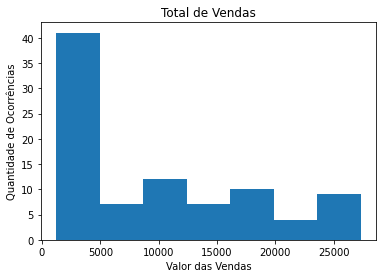

In [15]:
# plotar um histograma do total de vendas
plt.hist('Total de Vendas', data = df, bins = 7)
plt.title('Total de Vendas')
plt.xlabel('Valor das Vendas')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

In [ ]:
#@title Solução
plt.hist('Total de Vendas', data=df)
plt.title("Histograma de Vendas")
plt.ylabel("Quantidade de ocorrências")
plt.xlabel("Valor da Compra")
plt.show()

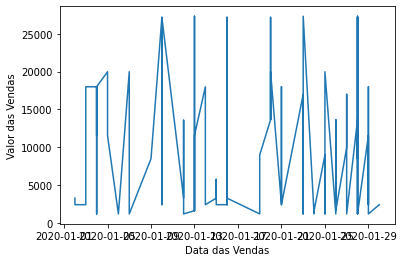

In [20]:
# rode a célula para transformar a coluna Datas para o formato datetime
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])

# plotar um gráfico de linha das vendas ao longo do tempo
plt.plot('Data da Venda', 'Total de Vendas', data=df)
plt.ylabel("Valor das Vendas")
plt.xlabel('Data das Vendas')
plt.show()

In [ ]:
#@title Solução
# criando o plot

plt.plot('Data da Venda', 'Total de Vendas', data=df)

# definindo título
plt.title("Vendas")
plt.ylabel("Total em Vendas")
plt.xlabel("Data")
plt.xticks(rotation=45)

# mostrando gráfico
plt.show()

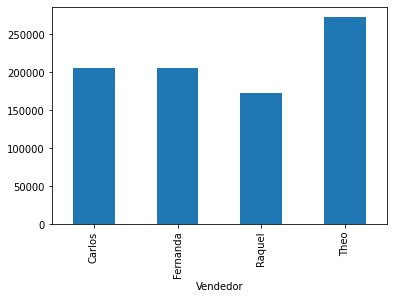

In [29]:
# plotar um gráfico de barras para os vendedores
df.groupby('Vendedor')['Total de Vendas'].sum().plot.bar()

In [ ]:
#@title Solução
df.groupby('Vendedor')['Total de Vendas'].sum().plot.bar();

In [30]:
# instalar o pywaffle
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.2 MB 62.6 MB/s 


In [31]:
# importar as bibliotecas necessárias
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [38]:
# calcular produtos mais vendidos e montar dicionário
a = dict(df["Item"].value_counts())
a

{'Canon 5D Mark III': 8,
 'Canon 6D Mark II': 8,
 'DJI Mavic Air 2': 8,
 'DJI Ronin-S': 7,
 'Filtro ND 2 Stop': 6,
 'Filtro ND 3 Stop': 11,
 'Filtro ND 5 Stop': 14,
 'Lente 16-35mm f/2.8': 12,
 'Lente 50mm f/1.4': 10,
 'Lente 85mm f/1.4': 6}

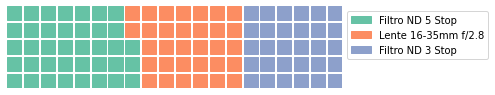

In [40]:
# plotar um gráfico de pizza ou waffle para os produtos mais vendidos
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=20,
                values={'Filtro ND 5 Stop': 14,
                        'Lente 16-35mm f/2.8': 12,
                        'Filtro ND 3 Stop': 11},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
#@title Solução
a = dict(df["Item"].value_counts())

labels = a.keys()
valores = a.values()

# criando gráfico de pizza
plt.pie(x=valores, labels=labels)

# definindo título
plt.title("Itens Mais Vendidos")

# mostrando o gráfico
plt.show()

In [44]:
# calcular os produtos mais vendidos em valores monetários
df.groupby('Item')['Preço Unitário'].sum()

Item
Canon 5D Mark III      109200
Canon 6D Mark II        68000
DJI Mavic Air 2        108640
DJI Ronin-S             40530
Filtro ND 2 Stop         7320
Filtro ND 3 Stop        13420
Filtro ND 5 Stop        17080
Lente 16-35mm f/2.8    107964
Lente 50mm f/1.4        16490
Lente 85mm f/1.4        59934
Name: Preço Unitário, dtype: int64

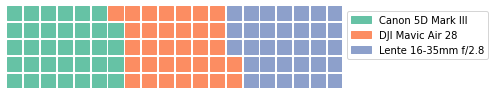

In [45]:
# plotar um gráfico de pizza ou waffle para os produtos mais vendidos em valores monetários
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=20,
                values={'Canon 5D Mark III': 109200,
                        'DJI Mavic Air 28': 108640,
                        'Lente 16-35mm f/2.8': 107964},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1, 1)}
                )

fig.set_tight_layout(False)
plt.show()